In [15]:
# Импортируем необходимые библиотеки
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.datasets import load_iris

# Загрузка данных
iris_data = load_iris()
X = iris_data.data
y = iris_data.target

# Оставляем только два класса: 'versicolor' и 'virginica'
mask = (y == 1) | (y == 2)
X = X[mask]
y = y[mask]

# Преобразование меток классов в числа
le = LabelEncoder()
y = le.fit_transform(y)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Нормализация данных
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

In [16]:
# Определение функции для создания модели нейронной сети
def create_model(hidden_units):
    model = keras.Sequential([
        layers.Dense(hidden_units, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Экспериментальное определение оптимального количества нейронов в скрытом слое
hidden_units_list = [2, 4, 8, 16, 32, 64, 128, 256]
accuracy_results = []

for hidden_units in hidden_units_list:
    fold_accuracies = []
    for _ in range(5):  # 5-кратное обучение
        model = create_model(hidden_units)
        model.fit(X_train, y_train, epochs=50, verbose=0,validation_data = (X_test, y_test))
        y_pred = (model.predict(X_test) > 0.5).astype(int)
        accuracy = accuracy_score(y_test, y_pred)
        fold_accuracies.append(accuracy)
    
    average_accuracy = np.mean(fold_accuracies)
    accuracy_results.append(average_accuracy)

1/1 [==============================] - 0s 51ms/step


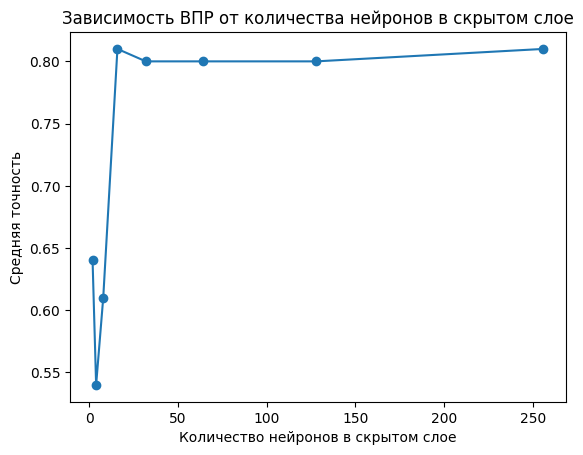

Оптимальное количество нейронов в скрытом слое: 256
Epoch 1/80
3/3 [==============================] - 1s 82ms/step - loss: 0.6943 - accuracy: 0.5250 - val_loss: 0.6916 - val_accuracy: 0.4000
Epoch 2/80
3/3 [==============================] - 0s 20ms/step - loss: 0.6759 - accuracy: 0.5375 - val_loss: 0.6783 - val_accuracy: 0.5500
Epoch 3/80
3/3 [==============================] - 0s 22ms/step - loss: 0.6601 - accuracy: 0.7250 - val_loss: 0.6663 - val_accuracy: 0.7500
Epoch 4/80
3/3 [==============================] - 0s 20ms/step - loss: 0.6450 - accuracy: 0.7750 - val_loss: 0.6562 - val_accuracy: 0.7500
Epoch 5/80
3/3 [==============================] - 0s 20ms/step - loss: 0.6292 - accuracy: 0.7750 - val_loss: 0.6473 - val_accuracy: 0.7500
Epoch 6/80
3/3 [==============================] - 0s 21ms/step - loss: 0.6161 - accuracy: 0.7750 - val_loss: 0.6396 - val_accuracy: 0.7500
Epoch 7/80
3/3 [==============================] - 0s 24ms/step - loss: 0.6020 - accuracy: 0.7750 - val_loss: 0.630

In [17]:
# Построение графика зависимости ВПР от количества нейронов в скрытом слое
import matplotlib.pyplot as plt

plt.plot(hidden_units_list, accuracy_results, marker='o')
plt.title('Зависимость ВПР от количества нейронов в скрытом слое')
plt.xlabel('Количество нейронов в скрытом слое')
plt.ylabel('Средняя точность')
plt.show()

# Выбор оптимального количества нейронов
optimal_hidden_units = hidden_units_list[np.argmax(accuracy_results)]
print(f'Оптимальное количество нейронов в скрытом слое: {optimal_hidden_units}')

# Обучение модели с оптимальным количеством нейронов
final_model = create_model(optimal_hidden_units)
history = final_model.fit(X_train, y_train, epochs=80, verbose=1,validation_data = (X_test, y_test))

# Оценка точности на тестовой выборке
test_accuracy = final_model.evaluate(X_test, y_test)[1]
print(f'Точность на тестовой выборке: {test_accuracy}')
